In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

raw = pd.read_csv('stock_prices_10yr_all_companies.csv', header=None)

tickers = raw.iloc[0, 1:].values
features = raw.iloc[1, 1:].values
columns = ['Date'] + [f'{tickers[i]}_{features[i]}' for i in range(len(tickers))]

df = pd.DataFrame(raw.values[2:], columns=columns)

# Cleanup
df = df[df['Date'].astype(str) != 'Date']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['Date'])  # drop rows with invalid dates

In [5]:
best_avg_accuracy = 0
best_ratio = None
targets = "GOOGL", "META", "NFLX", "TMUS", "DIS", "T", "VZ", "CMCSA", "SPOT", "CHTR"
for split_ratio in np.arange(0.5, 0.99, 0.01):
    print(f"\nTrying split ratio: {split_ratio:.0%}")
    accuracies = []
    for target in targets:
        temp_df = df.copy()
        cols = [f'Close_{target}', f'High_{target}', f'Low_{target}']
        temp_df[cols] = temp_df[cols].astype(float)
        temp_df['Prev_Close'] = temp_df[f'Close_{target}'].shift(1)
        temp_df['Target_Up'] = (temp_df[f'Close_{target}'] > temp_df['Prev_Close']).astype(int)
        temp_df.dropna(inplace=True)

        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(temp_df[['Prev_Close']])

        X = scaled
        y = temp_df['Target_Up'].values

        split = int(len(X) * split_ratio)
        X_train, y_train = X[:split], y[:split]
        X_test, y_test = X[split:], y[split:]
        dates_test = temp_df['Date'].iloc[split:]
        real_close = temp_df[f'Close_{target}'].iloc[split:].values

        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        real_trend = np.where(np.diff(real_close) > 0, 1, 0)
        pred_trend = y_pred[:-1]
        trend_accuracy = accuracy_score(real_trend, pred_trend)
        accuracies.append(trend_accuracy)
    
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average Accuracy for split ratio {split_ratio:.0%}: {avg_accuracy:.2%}")
    
    if avg_accuracy > best_avg_accuracy:
        best_avg_accuracy = avg_accuracy
        best_ratio = split_ratio

print(f"\nBest split ratio: {best_ratio:.0%} with average accuracy: {best_avg_accuracy:.2%}")



Trying split ratio: 50%
Average Accuracy for split ratio 50%: 49.90%

Trying split ratio: 51%
Average Accuracy for split ratio 51%: 49.81%

Trying split ratio: 52%
Average Accuracy for split ratio 52%: 49.71%

Trying split ratio: 53%
Average Accuracy for split ratio 53%: 49.69%

Trying split ratio: 54%
Average Accuracy for split ratio 54%: 49.57%

Trying split ratio: 55%
Average Accuracy for split ratio 55%: 49.53%

Trying split ratio: 56%
Average Accuracy for split ratio 56%: 49.60%

Trying split ratio: 57%
Average Accuracy for split ratio 57%: 49.57%

Trying split ratio: 58%
Average Accuracy for split ratio 58%: 49.65%

Trying split ratio: 59%
Average Accuracy for split ratio 59%: 49.71%

Trying split ratio: 60%
Average Accuracy for split ratio 60%: 49.79%

Trying split ratio: 61%
Average Accuracy for split ratio 61%: 49.88%

Trying split ratio: 62%
Average Accuracy for split ratio 62%: 49.93%

Trying split ratio: 63%
Average Accuracy for split ratio 63%: 50.10%

Trying split ratio:

Trend prediction accuracy for GOOGL: 44.23%

Sample predictions:
2025-01-21 | Close: $197.82 | Signal: Buy
2025-01-22 | Close: $198.14 | Signal: Buy
2025-01-23 | Close: $197.75 | Signal: Buy
2025-01-24 | Close: $199.98 | Signal: Buy
2025-01-27 | Close: $191.59 | Signal: Buy
2025-01-28 | Close: $195.08 | Signal: Buy
2025-01-29 | Close: $195.19 | Signal: Buy
2025-01-30 | Close: $200.64 | Signal: Buy
2025-01-31 | Close: $203.79 | Signal: Buy
2025-02-03 | Close: $201.00 | Signal: Buy


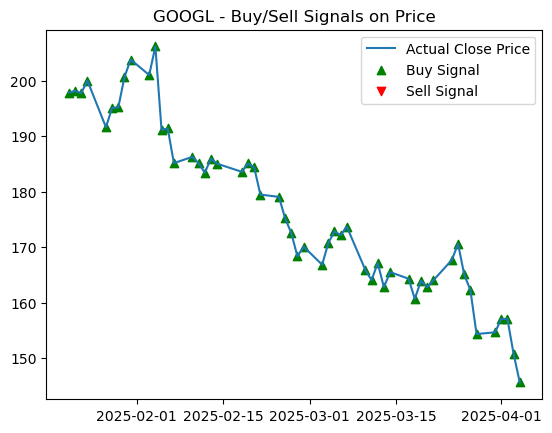

Trend prediction accuracy for META: 44.23%

Sample predictions:
2025-01-21 | Close: $615.91 | Signal: Sell
2025-01-22 | Close: $622.95 | Signal: Sell
2025-01-23 | Close: $635.88 | Signal: Sell
2025-01-24 | Close: $646.91 | Signal: Sell
2025-01-27 | Close: $659.29 | Signal: Sell
2025-01-28 | Close: $673.73 | Signal: Sell
2025-01-29 | Close: $675.89 | Signal: Sell
2025-01-30 | Close: $686.39 | Signal: Sell
2025-01-31 | Close: $688.57 | Signal: Sell
2025-02-03 | Close: $696.84 | Signal: Sell


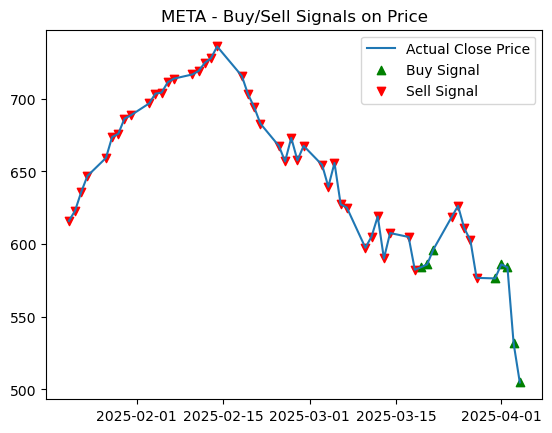

Trend prediction accuracy for NFLX: 50.00%

Sample predictions:
2025-01-21 | Close: $869.68 | Signal: Buy
2025-01-22 | Close: $953.99 | Signal: Buy
2025-01-23 | Close: $984.86 | Signal: Buy
2025-01-24 | Close: $977.59 | Signal: Buy
2025-01-27 | Close: $971.89 | Signal: Buy
2025-01-28 | Close: $971.83 | Signal: Buy
2025-01-29 | Close: $978.15 | Signal: Buy
2025-01-30 | Close: $973.24 | Signal: Buy
2025-01-31 | Close: $976.76 | Signal: Buy
2025-02-03 | Close: $978.94 | Signal: Buy


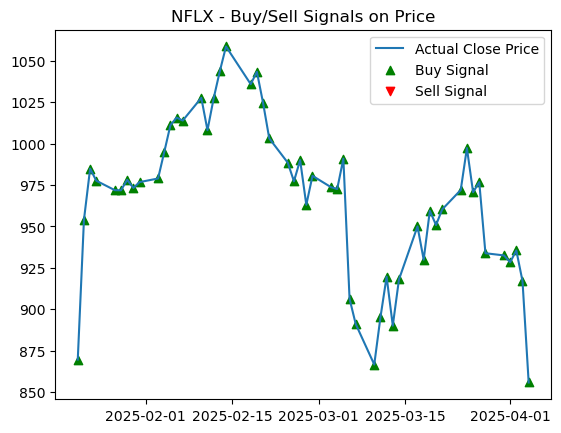

Trend prediction accuracy for TMUS: 55.77%

Sample predictions:
2025-01-21 | Close: $218.76 | Signal: Buy
2025-01-22 | Close: $217.45 | Signal: Buy
2025-01-23 | Close: $215.32 | Signal: Buy
2025-01-24 | Close: $217.84 | Signal: Buy
2025-01-27 | Close: $220.69 | Signal: Buy
2025-01-28 | Close: $220.40 | Signal: Buy
2025-01-29 | Close: $234.37 | Signal: Buy
2025-01-30 | Close: $233.59 | Signal: Buy
2025-01-31 | Close: $232.19 | Signal: Buy
2025-02-03 | Close: $237.31 | Signal: Buy


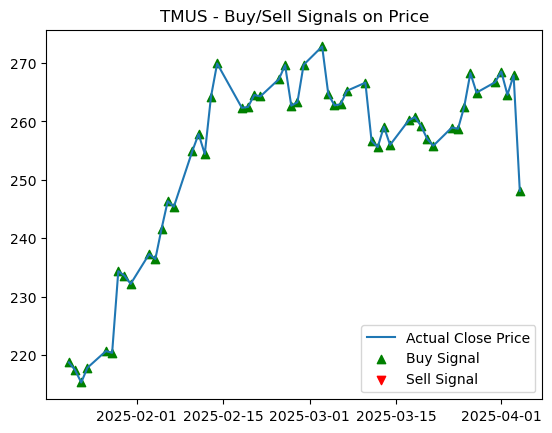

Trend prediction accuracy for DIS: 50.00%

Sample predictions:
2025-01-21 | Close: $108.70 | Signal: Buy
2025-01-22 | Close: $108.81 | Signal: Buy
2025-01-23 | Close: $111.04 | Signal: Buy
2025-01-24 | Close: $112.16 | Signal: Buy
2025-01-27 | Close: $113.34 | Signal: Buy
2025-01-28 | Close: $112.14 | Signal: Buy
2025-01-29 | Close: $113.19 | Signal: Buy
2025-01-30 | Close: $113.43 | Signal: Buy
2025-01-31 | Close: $113.06 | Signal: Buy
2025-02-03 | Close: $114.00 | Signal: Buy


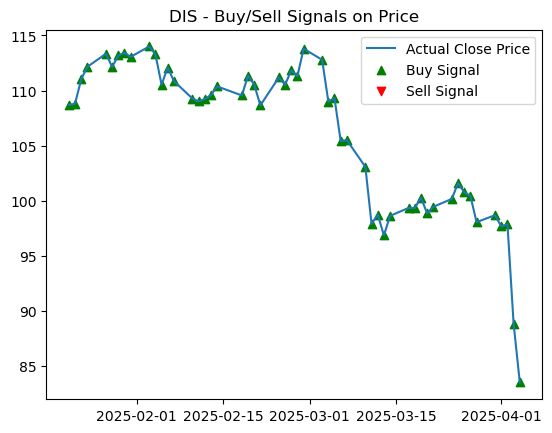

Trend prediction accuracy for T: 53.85%

Sample predictions:
2025-01-21 | Close: $22.49 | Signal: Buy
2025-01-22 | Close: $22.32 | Signal: Buy
2025-01-23 | Close: $22.53 | Signal: Buy
2025-01-24 | Close: $22.72 | Signal: Buy
2025-01-27 | Close: $24.14 | Signal: Buy
2025-01-28 | Close: $24.40 | Signal: Buy
2025-01-29 | Close: $24.23 | Signal: Buy
2025-01-30 | Close: $24.02 | Signal: Buy
2025-01-31 | Close: $23.73 | Signal: Buy
2025-02-03 | Close: $24.25 | Signal: Buy


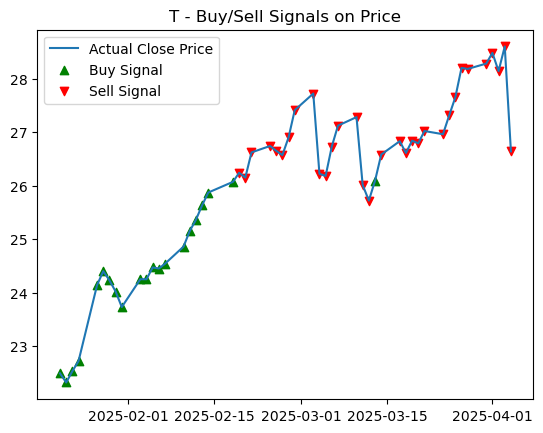

Trend prediction accuracy for VZ: 53.85%

Sample predictions:
2025-01-21 | Close: $39.02 | Signal: Buy
2025-01-22 | Close: $38.95 | Signal: Buy
2025-01-23 | Close: $39.18 | Signal: Buy
2025-01-24 | Close: $39.54 | Signal: Buy
2025-01-27 | Close: $40.64 | Signal: Buy
2025-01-28 | Close: $40.40 | Signal: Buy
2025-01-29 | Close: $40.28 | Signal: Buy
2025-01-30 | Close: $39.47 | Signal: Buy
2025-01-31 | Close: $39.39 | Signal: Buy
2025-02-03 | Close: $39.98 | Signal: Buy


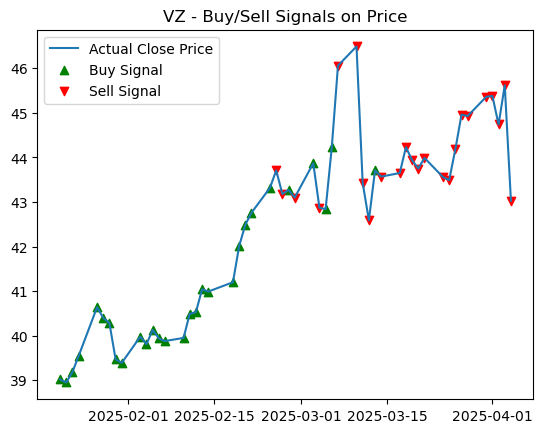

Trend prediction accuracy for CMCSA: 59.62%

Sample predictions:
2025-01-21 | Close: $36.64 | Signal: Buy
2025-01-22 | Close: $36.78 | Signal: Buy
2025-01-23 | Close: $37.13 | Signal: Buy
2025-01-24 | Close: $37.28 | Signal: Buy
2025-01-27 | Close: $37.89 | Signal: Buy
2025-01-28 | Close: $37.21 | Signal: Buy
2025-01-29 | Close: $37.02 | Signal: Buy
2025-01-30 | Close: $32.95 | Signal: Buy
2025-01-31 | Close: $33.36 | Signal: Buy
2025-02-03 | Close: $32.89 | Signal: Buy


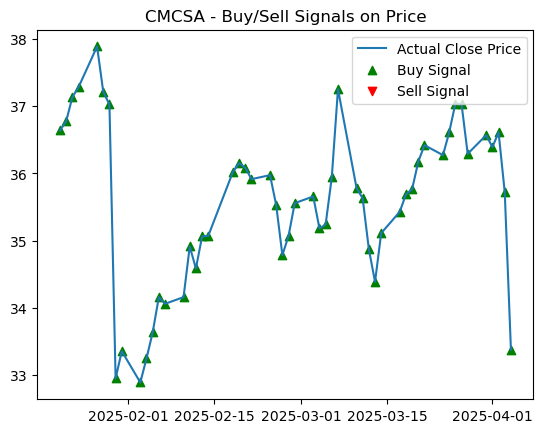

Trend prediction accuracy for SPOT: 67.31%

Sample predictions:
2025-01-21 | Close: $487.51 | Signal: Buy
2025-01-22 | Close: $493.56 | Signal: Buy
2025-01-23 | Close: $501.50 | Signal: Buy
2025-01-24 | Close: $510.43 | Signal: Buy
2025-01-27 | Close: $513.98 | Signal: Buy
2025-01-28 | Close: $530.80 | Signal: Buy
2025-01-29 | Close: $538.83 | Signal: Buy
2025-01-30 | Close: $550.13 | Signal: Buy
2025-01-31 | Close: $548.55 | Signal: Buy
2025-02-03 | Close: $549.08 | Signal: Buy


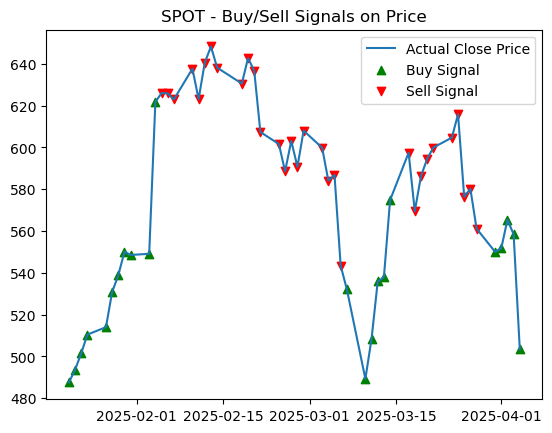

Trend prediction accuracy for CHTR: 51.92%

Sample predictions:
2025-01-21 | Close: $350.56 | Signal: Buy
2025-01-22 | Close: $352.80 | Signal: Buy
2025-01-23 | Close: $359.96 | Signal: Buy
2025-01-24 | Close: $367.58 | Signal: Buy
2025-01-27 | Close: $367.49 | Signal: Buy
2025-01-28 | Close: $365.38 | Signal: Buy
2025-01-29 | Close: $359.33 | Signal: Buy
2025-01-30 | Close: $336.62 | Signal: Buy
2025-01-31 | Close: $345.49 | Signal: Buy
2025-02-03 | Close: $341.50 | Signal: Buy


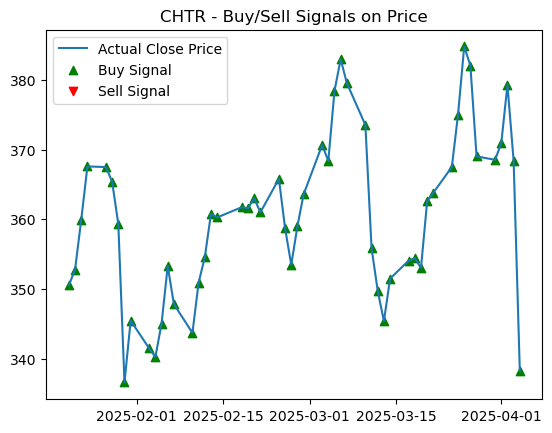

Average Accuracy: 51.86%


In [7]:
for target in targets:
    temp_df = df.copy()
    cols = [f'Close_{target}', f'High_{target}', f'Low_{target}']
    temp_df[cols] = temp_df[cols].astype(float)
    temp_df['Prev_Close'] = temp_df[f'Close_{target}'].shift(1)
    temp_df['Target_Up'] = (temp_df[f'Close_{target}'] > temp_df['Prev_Close']).astype(int)

    temp_df.dropna(inplace=True)
    
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(temp_df[['Prev_Close']])

    X = scaled
    y = temp_df['Target_Up'].values

    split = int(len(X) * 0.97)
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]
    dates_test = temp_df['Date'].iloc[split:]
    real_close = temp_df[f'Close_{target}'].iloc[split:].values

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    signals = np.where(y_pred == 1, 'Buy', 'Sell')

    real_trend = np.where(np.diff(real_close) > 0, 1, 0)
    pred_trend = y_pred[:-1]
    trend_accuracy = accuracy_score(real_trend, pred_trend)
    accuracies.append(trend_accuracy)
    print(f"Trend prediction accuracy for {target}: {trend_accuracy:.2%}")
    print("\nSample predictions:")
    for i in range(10):
        print(f"{dates_test.iloc[i].date()} | Close: ${real_close[i]:.2f} | Signal: {signals[i]}")
    plt.plot(dates_test, real_close, label="Actual Close Price")

    # Overlay buy/sell signals
    buy_signals = dates_test[y_pred == 1]
    sell_signals = dates_test[y_pred == 0]

    plt.scatter(buy_signals, real_close[y_pred == 1], marker='^', color='g', label='Buy Signal')
    plt.scatter(sell_signals, real_close[y_pred == 0], marker='v', color='r', label='Sell Signal')

    plt.legend()
    plt.title(f"{target} - Buy/Sell Signals on Price")
    plt.show()
print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.2%}")